In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [5]:
data = pd.read_csv('../../trainingandtestdata/training.1600000.processed.noemoticon.csv', engine='python', names=['score', 'id', 'date', 'query', 'user', 'text'])

In [6]:
data

,score,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.1, random_state=42)

In [8]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
train['text'].head()

0           just saw your picture and my heart melted 
1    @ethanonly it's during the uni exam period   #...
2                    Jammin To Capital In My Garde  xx
3    Talking to Mike on skype.. The greatest thing ...
4    Gosh, Don't you hate those guys who are just s...
Name: text, dtype: object

In [9]:
train['score'] = train[['score']].replace({4: 1})

In [30]:
def words_in_text(words, texts):
    '''
    words: list of str
    text: pd series of texts
    '''
    indicator_array = np.zeros((len(texts), len(words)))
    exclamations = []
    for idt in range(len(texts)):
        totalexclamation = 0
        for idw in range(len(words)):
            if words[idw] in str(texts[idt]):
                indicator_array[idt, idw] = 1
            if '!' in words[idw]:
                totalexclamation += 1
        exclamations.append(totalexclamation)
    npexclamation = np.array(exclamations)
    
    print(np.shape(npexclamation), np.shape(indicator_array))
    
    return np.hstack([npexclamation.reshape((len(npexclamation), 1)), indicator_array])

In [31]:
def featurize(data, size=len(data)):
    
    # Get avg len of words
    num_words = data['text'].head(size).str.split().apply(len)
    num_chars = data['text'].head(size).str.len()
    avg_word_len = np.array(num_chars / num_words)
    avg_word_len = avg_word_len.reshape((len(avg_word_len), 1))
    
    # One hot encoding for words in tweet
    words = words_in_text(['upset', 'bad', 'love', 'hate', 'why', 'stupid'], data['text'].head(size))
    
    # think of another thing 

    return np.hstack([avg_word_len, words])

(100,) (100, 6)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(10000,) (10000, 6)
training accuracy for 100 samples: 0.61
validation accuracy for 100 samples: 0.0847
*********************************
(500,) (500, 6)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(10000,) (10000, 6)
training accuracy for 500 samples: 0.624
validation accuracy for 500 samples: 0.2284
*********************************
(1000,) (1000, 6)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(10000,) (10000, 6)
training accuracy for 1000 samples: 0.602
validation accuracy for 1000 samples: 0.2519
*********************************
(3000,) (3000, 6)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(10000,) (10000, 6)
training accuracy for 3000 samples: 0.6026666666666667
validation accuracy for 3000 samples: 0.2952
*********************************
(5000,) (5000, 6)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(10000,) (10000, 6)
training accuracy for 5000 samples: 0.605
validation accuracy for 5000 samples: 0.3154
*********************************
(7000,) (7000, 6)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(10000,) (10000, 6)
training accuracy for 7000 samples: 0.6022857142857143
validation accuracy for 7000 samples: 0.3336
*********************************
(10000,) (10000, 6)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(10000,) (10000, 6)
training accuracy for 10000 samples: 0.6014
validation accuracy for 10000 samples: 0.348
*********************************
(30000,) (30000, 6)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(10000,) (10000, 6)
training accuracy for 30000 samples: 0.5932
validation accuracy for 30000 samples: 0.3434
*********************************
(50000,) (50000, 6)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(10000,) (10000, 6)
training accuracy for 50000 samples: 0.59238
validation accuracy for 50000 samples: 0.3349
*********************************


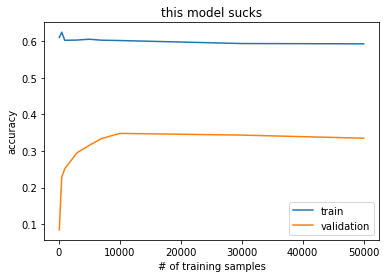

In [32]:
n = [100, 500, 1000, 3000, 5000, 7000, 10000, 30000, 50000] #number of samples to check
train_acc = []
valid_acc = []

for iters in n:
    
    X_train = featurize(train, iters)
    Y_train = train['score'].head(iters)

    # from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import LogisticRegression


    model = LogisticRegression()
    model.fit(X_train, Y_train)

    training_accuracy = model.score(X_train, Y_train)
    
    # calculate precision, recall, threshold
    
    validation_accuracy = model.score(featurize(test, 10000), test['score'].head(10000))
    
    train_acc.append(training_accuracy)
    valid_acc.append(validation_accuracy)
    
    print(f"training accuracy for {iters} samples: {training_accuracy}")
    print(f"validation accuracy for {iters} samples: {validation_accuracy}")
    print('*********************************')

#visualization
plt.plot(n, train_acc, label='train')
plt.plot(n, valid_acc, label='validation')
plt.xlabel('# of training samples')
plt.ylabel('accuracy')
plt.legend()
plt.title('this model sucks');

In [33]:
featurize(train.head(10), 5)

(5,) (5, 6)


array([[5.25      , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [6.625     , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.71428571, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [5.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.85      , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        ]])